# 03 - Modeling với NumPy: Logistic Regression & KNN

Nội dung:

- Load dữ liệu đã tiền xử lý từ `data/processed/hr_data_processed.csv`.
- Chia train/test bằng hàm `train_test_split` tự cài.
- Huấn luyện Logistic Regression (`NumpyLogisticRegression`) dùng Gradient Descent.
- Tính các độ đo đánh giá:
  - Accuracy, Precision, Recall, F1-score.
- Vẽ loss curve (Binary Cross-Entropy theo epoch).
- Thử thêm 1 model KNN (`NumpyKNNClassifier`) để so sánh.
- Thực hiện K-fold cross-validation bằng `k_fold_cross_val`.


In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập BASE_DIR = thư mục gốc của project
BASE_DIR = os.path.abspath("..")
sys.path.append(BASE_DIR)

from src.models import (
    train_test_split,
    NumpyLogisticRegression,
    NumpyKNNClassifier,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    k_fold_cross_val,
    binary_cross_entropy,
)

print("BASE_DIR:", BASE_DIR)

PROCESSED_PATH = os.path.join(BASE_DIR, "data", "processed", "hr_data_processed.csv")
print("PROCESSED_PATH:", PROCESSED_PATH)
print("File tồn tại?", os.path.exists(PROCESSED_PATH))

# Load dữ liệu đã xử lý:
# Cột 0: y, các cột còn lại: X
data_processed = np.loadtxt(PROCESSED_PATH, delimiter=",")
y = data_processed[:, 0].astype(int)
X = data_processed[:, 1:].astype(float)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Tỷ lệ lớp (0/1):", np.unique(y, return_counts=True))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    seed=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


(19158, 42) (19158,)


## Huấn luyện Logistic Regression (NumpyLogisticRegression)

- Learning rate (`lr`): 0.1 (có thể chỉnh nếu loss không giảm đẹp).
- Số vòng lặp (`n_iter`): 2000.
- Regularization `l2`: 0.0 (có thể tăng nếu overfit).


In [ ]:
logreg = NumpyLogisticRegression(
    lr=0.1,
    n_iter=2000,
    l2=0.0,
    verbose=True,   # in loss mỗi 50 iter (do bạn cài)
)

logreg.fit(X_train, y_train)

print("Số lần ghi loss:", len(logreg.losses))
print("Loss lần cuối (train):", logreg.losses[-1])


Train size: (15327, 42)
Test size: (3831, 42)


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(logreg.losses, marker="o")
plt.xlabel("Checkpoint (mỗi 50 vòng lặp)")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Learning Curve - Logistic Regression (train)")
plt.tight_layout()
plt.show()


Iter    0 | Loss: 0.693147
Iter   50 | Loss: 0.551240
Iter  100 | Loss: 0.510221
Iter  150 | Loss: 0.494204
Iter  200 | Loss: 0.487066
Iter  250 | Loss: 0.483599
Iter  300 | Loss: 0.481812
Iter  350 | Loss: 0.480852
Iter  400 | Loss: 0.480320
Iter  450 | Loss: 0.480019
Iter  500 | Loss: 0.479845
Iter  550 | Loss: 0.479744
Iter  600 | Loss: 0.479684
Iter  650 | Loss: 0.479649
Iter  700 | Loss: 0.479628
Iter  750 | Loss: 0.479615
Iter  800 | Loss: 0.479607
Iter  850 | Loss: 0.479603
Iter  900 | Loss: 0.479600
Iter  950 | Loss: 0.479598
Iter 1000 | Loss: 0.479597
Iter 1050 | Loss: 0.479597
Iter 1100 | Loss: 0.479596
Iter 1150 | Loss: 0.479596
Iter 1200 | Loss: 0.479596
Iter 1250 | Loss: 0.479596
Iter 1300 | Loss: 0.479596
Iter 1350 | Loss: 0.479596
Iter 1400 | Loss: 0.479596
Iter 1450 | Loss: 0.479596
Iter 1500 | Loss: 0.479596
Iter 1550 | Loss: 0.479596
Iter 1600 | Loss: 0.479596
Iter 1650 | Loss: 0.479596
Iter 1700 | Loss: 0.479596
Iter 1750 | Loss: 0.479596
Iter 1800 | Loss: 0.479596
I

In [ ]:
# Dự đoán
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Train metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("=== Train (Logistic Regression) ===")
print(f"Accuracy : {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall   : {train_rec:.4f}")
print(f"F1-score : {train_f1:.4f}")

print("\n=== Test (Logistic Regression) ===")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall   : {test_rec:.4f}")
print(f"F1-score : {test_f1:.4f}")


Accuracy: 0.7697729052466719
Precision: 0.5791855203619896
Recall: 0.2689075630252098
F1: 0.36728837876570697


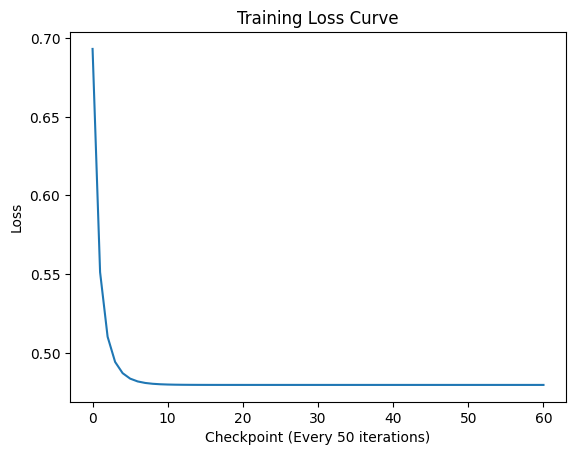

In [ ]:
knn = NumpyKNNClassifier(k=5)
knn.fit(X_train, y_train)

y_test_pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_test_pred_knn)
knn_prec = precision_score(y_test, y_test_pred_knn)
knn_rec = recall_score(y_test, y_test_pred_knn)
knn_f1 = f1_score(y_test, y_test_pred_knn)

print("=== Test (KNN, k=5) ===")
print(f"Accuracy : {knn_acc:.4f}")
print(f"Precision: {knn_prec:.4f}")
print(f"Recall   : {knn_rec:.4f}")
print(f"F1-score : {knn_f1:.4f}")


In [ ]:
scores_logreg_cv = k_fold_cross_val(
    NumpyLogisticRegression,
    X,
    y,
    k_folds=5,
    lr=0.1,
    n_iter=1000,
    l2=0.0,
)

print("=== 5-fold CV - Logistic Regression ===")
for k, v in scores_logreg_cv.items():
    print(f"{k}: {v:.4f}")

KNN Accuracy: 0.7428869746802401
KNN F1: 0.3599740090963438
